In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [55]:
df = pd.read_csv("./ushape.csv", header=None, names=["X", "Y", "CLASS"])
df.head()

,X,Y,CLASS
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


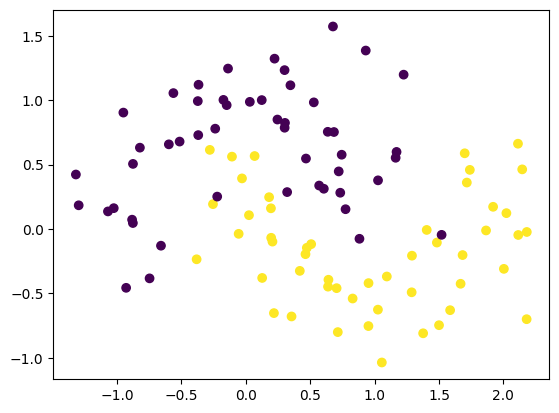

In [56]:
plt.scatter(df["X"], df["Y"], c=df["CLASS"])

In [57]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.initializers import GlorotUniform

In [68]:
model = Sequential()

model.add(Dense(10, activation="tanh", input_dim=2, kernel_initializer='he_normal'))
model.add(Dense(10, activation="tanh", kernel_initializer='he_normal'))
model.add(Dense(10, activation="tanh", kernel_initializer='he_normal'))
model.add(Dense(10, activation="tanh", kernel_initializer='he_normal'))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.get_weights()

[array([[ 0.15860778, -1.4968873 ,  0.21357322, -1.0623233 ,  1.1671352 ,
         -0.4641338 ,  0.433779  , -1.8968177 ,  1.9337137 , -0.01788661],
        [-0.37832808, -0.46450606,  1.2643929 ,  0.37698245, -0.6566558 ,
         -0.4861185 , -0.19636719, -1.5482621 ,  2.1837506 , -0.542712  ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.02811496,  0.0388329 ,  0.25223708, -0.05453309, -1.0104846 ,
         -0.58534324, -0.3548771 ,  0.05950854, -0.31487727,  0.4639895 ],
        [-0.45197144,  0.07833547, -0.06494758, -0.51732296, -0.4484506 ,
         -0.14542991,  0.28577164,  0.02200928, -0.22030196, -0.5470485 ],
        [ 0.01283596, -0.15553471,  0.02300285, -0.2071334 ,  0.01000486,
         -0.41752216,  0.20537572,  0.48994806,  0.4358648 , -0.0435115 ],
        [ 0.35694343, -0.7129128 , -0.29337806,  0.22164886, -0.09208654,
          0.08760744,  0.18754384,  0.02768886,  0.536231  ,  0.71017647],
        [ 0.88596

In [61]:
initial_weights = model.get_weights()

In [62]:
initial_weights[0] = np.random.randn(2, 10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [63]:
model.set_weights(initial_weights)

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
history = model.fit(X, y, epochs=100, verbose=1, validation_split=0.2)    

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8031 - loss: 0.5454 - val_accuracy: 0.8500 - val_loss: 0.4784
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8047 - loss: 0.5244 - val_accuracy: 0.8500 - val_loss: 0.4532
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8359 - loss: 0.4860 - val_accuracy: 0.8500 - val_loss: 0.4311
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8164 - loss: 0.4885 - val_accuracy: 0.8500 - val_loss: 0.4129
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8211 - loss: 0.4797 - val_accuracy: 0.8500 - val_loss: 0.3972
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8094 - loss: 0.4744 - val_accuracy: 0.8500 - val_loss: 0.3827
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8523 - loss: 0.4385 - val_accuracy: 0.8500 - val_loss: 0.3692
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8445 - loss: 0.4324 - val_accuracy: 0.8500 - val_loss

In [71]:
model.get_weights()

[array([[-1.6233343 , -0.556367  , -0.5344359 ,  0.5515625 , -1.4307383 ,
          0.8289589 , -1.935091  ,  0.5246776 ,  0.1757027 , -1.1272157 ],
        [ 0.19388162,  0.9670185 ,  0.09402818,  0.6984359 ,  0.3794196 ,
         -0.41741017,  0.1754708 , -0.6726536 , -1.4597911 ,  0.16898976]],
       dtype=float32),
 array([ 0.02727553, -0.02094502, -0.12684198, -0.18954459,  0.2085924 ,
        -0.10447669,  0.26875547, -0.07475879, -0.12108457, -0.21573795],
       dtype=float32),
 array([[-5.85930169e-01, -3.64185214e-01,  6.72037423e-01,
          2.61269391e-01,  7.97533095e-01, -4.60857600e-01,
         -1.47267580e-01,  1.66066870e-01,  5.78981340e-02,
         -2.66328871e-01],
        [ 5.92264175e-01,  2.06713855e-01, -4.75965589e-01,
         -2.69359827e-01, -1.10760637e-01, -2.06095114e-01,
         -2.58539766e-01,  5.51665604e-01, -3.56353343e-01,
         -2.03405097e-01],
        [ 3.17536384e-01,  6.03045404e-01, -2.29905218e-01,
         -2.25238159e-01,  3.90137

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 535us/step


<Axes: >

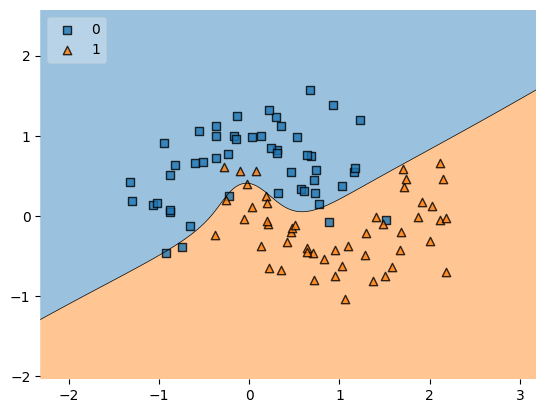

In [72]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)